# Cutting the sample down to Shibayama sample and adding binaries.

In [ ]:
#Necessary modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import csv 

Number of stars in the final sample: 194004


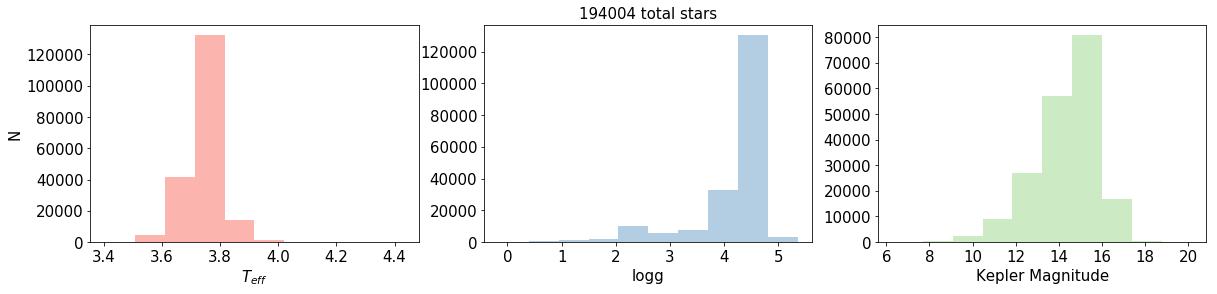

In [15]:
#Checking the current sample
data = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')
teff = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['logTe']
logg = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['logg']
kep_mag = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['Kepler']
print('Number of stars in the final sample: ' + str(len(kep_mag)))
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.hist(teff, color='#fbb4ae')
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$T_{eff}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(132)
plt.hist(logg, color='#b3cde3')
plt.title(str(len(kep_mag)) + ' total stars', fontsize=15)
plt.xlabel('logg', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(133)
plt.hist(kep_mag, color='#ccebc5')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.savefig('/Users/Jess/699-2/final_github_code/histograms_whole_sample_to_mathur.png')
plt.show()

First the stars should be cut to reflect the Shibayama (2013) sample. This is done by cutting to the same parameters given in the Shibayama (2013) paper. 

In [91]:
g_stars = data[(data["logTe"] >= np.log10(5100)) & (data["logTe"] <= np.log10(6000)) & (data['logg'] >= 4)]   
print('Number of G stars in the binary sample: ' + str(len(g_stars['logTe'])))
print('Number of stars in the Shibayama sample: 80000')
np.savetxt('/Users/Jess/699-2/final_github_code/g_stars.csv', g_stars, delimiter=',', header='Index,Gc,ilogAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,DDO51_finf,Mact,z.1')

Number of G stars in the binary sample: 82396
Number of stars in the Shibayama sample: 80000


Because the whole data cut from Shibayama is not available, will cut the Mathur catalog with the same parameters for G stars to see if our samples of G are the same. 

In [92]:
g_stars = pd.read_csv('/Users/Jess/699-2/final_github_code/g_stars.csv')
teff_g = pd.read_csv('/Users/Jess/699-2/final_github_code/g_stars.csv')['logTe']
logg_g = pd.read_csv('/Users/Jess/699-2/final_github_code/g_stars.csv')['logg']
kep_mag_g = pd.read_csv('/Users/Jess/699-2/final_github_code/g_stars.csv')['Kepler']

In [93]:
mathur = pd.read_csv('/Users/Jess/699-2/mathur_2017/mathur_2017_edited.txt', delimiter='|')

In [94]:
g_stars_mathur = mathur[(mathur["Teff"] >= 5100) & (mathur["Teff"] <= 6000) & (mathur['log(g)'] >= 4)]   
print('Number of G stars in M17: ' + str(len(g_stars_mathur['Teff'])))
print('Number of stars in the Shibayama sample: 80000')
teff_mathur = g_stars_mathur['Teff']
logg_mathur = g_stars_mathur['log(g)']

Number of G stars in M17: 74074
Number of stars in the Shibayama sample: 80000


<Figure size 432x288 with 0 Axes>

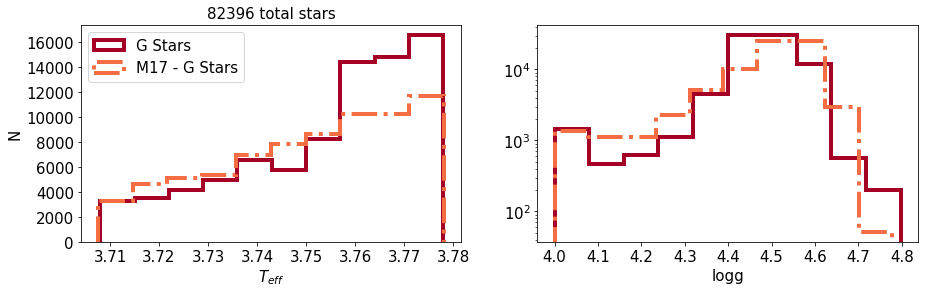

In [95]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(teff_g, color='#a50026', histtype='step', linewidth=4, label='G Stars')
plt.hist(np.log10(teff_mathur), histtype='step', linewidth=4, color='#f46d43', label='M17 - G Stars', linestyle='-.')
plt.title(str(len(kep_mag_g)) + ' total stars', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$T_{eff}$', fontsize=15)
plt.legend(loc=2, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.hist(logg_g, histtype='step', linewidth=4, color='#a50026')
plt.hist(logg_mathur, histtype='step', linewidth=4, color='#f46d43', linestyle='-.')
plt.xlabel('logg', fontsize=15)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.savefig('/Users/Jess/699-2/final_github_code/histograms_g_stars_to_shibayama.png')
plt.show()

The binaries will be added to the data. 

Number of binaries in the sample: 36266


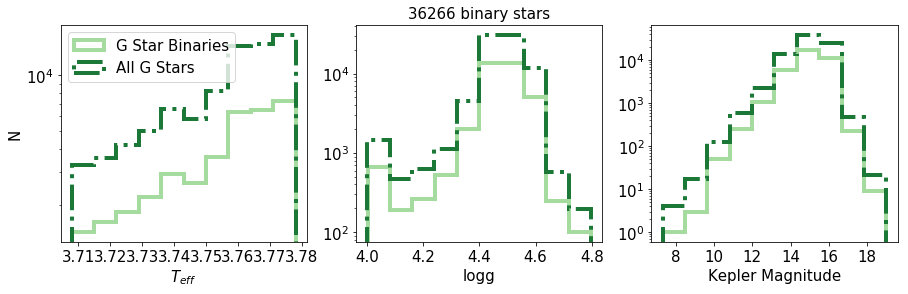

In [142]:
binaries = g_stars.sample(frac=0.44014209591474255, replace=False)
print("Number of binaries in the sample: " + str(len(binaries))) # Print number of binaries in the sample
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.hist(binaries['logTe'], histtype='step', color='#a6dba0', linewidth=4, label='G Star Binaries')
plt.hist(teff_g, histtype='step', linewidth=4, linestyle='-.', label='All G Stars', color='#1b7837')
plt.ylabel('N', fontsize=15)
plt.legend(loc=2, fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.xlabel(r'$T_{eff}$', fontsize=15)
plt.subplot(132)
plt.title(str(len(binaries)) + ' binary stars', fontsize=15)
plt.hist(binaries['logg'], histtype='step', color='#a6dba0', linewidth=4)
plt.hist(logg_g, histtype='step', linewidth=4, linestyle='-.', color='#1b7837')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('logg', fontsize=15)
plt.yscale('log')
plt.subplot(133)
plt.hist(binaries['Kepler'], histtype='step', color='#a6dba0', linewidth=4)
plt.hist(kep_mag_g, histtype='step', linewidth=4, linestyle='-.', color='#1b7837')
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.savefig('/Users/Jess/699-2/final_github_code/g_stars_comparison_binaries')
plt.show()
np.savetxt('/Users/Jess/699-2/final_github_code/G_with_binaries.csv', binaries, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,DDO51_finf,Mact,z.1')

Now binary properties will be injected into this sample.

In [157]:
def period_of_binary(num_of_stars): 
    mu, sigma = 5.03, 2.28 
    distribution = np.random.normal(mu, sigma, num_of_stars) 
    period = random.choice(distribution)  
    return period 

def mass_ratio_of_binary(num_of_stars): 
    mass_ratio = random.uniform(0.1, 1) 
    return mass_ratio 

In [158]:
binaries = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries.csv')

periods = [] 
mass_ratios = [] 

for i in range(0, len(binaries['# Index'])): 
    period = period_of_binary(1000) 
    mass_ratio = mass_ratio_of_binary(1000) 
    periods.append(period)
    mass_ratios.append(mass_ratio)

In [159]:
# Save a new CSV file with all the columns 
full_sample_array = np.column_stack((binaries,periods,mass_ratios))
np.savetxt('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters.csv', full_sample_array, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,DDO51_finf,Mact,z.1,periods,mass_ratios')
binaries_with_parameters = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters.csv')

This plot tests the distribution of the periods and mass ratios for the binary stars by plotting them against a distribution with an order of magnitude more stars. 

36266


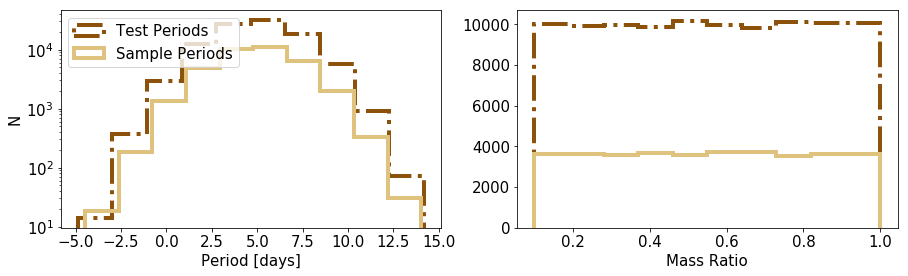

In [160]:
numbers = np.linspace(0, 100000, 100000)
print(len(binaries_with_parameters))
test_periods = []
test_mass_ratios = []
for i in numbers:
    a = period_of_binary(10000)
    test_periods.append(a)
for i in numbers: 
    a = mass_ratio_of_binary(10000)
    test_mass_ratios.append(a)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(test_periods, histtype='step', label='Test Periods', color='#8c510a', linewidth=4, linestyle='-.')
plt.hist(periods, histtype='step', label='Sample Periods', color='#dfc27d', linewidth=4)
plt.legend(loc=2, fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Period [days]', fontsize=15)
plt.yscale('log')
plt.subplot(122)
plt.hist(test_mass_ratios, histtype='step', color='#8c510a', linewidth=4, linestyle='-.')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mass Ratio', fontsize=15)
plt.hist(mass_ratios, histtype='step', color='#dfc27d', linewidth=4)
plt.savefig('/Users/Jess/699-2/final_github_code/period_mass_ratio.png')
plt.show()

Next we add the secondary mass to the sample by using the mass of the primary and the mass ratio. 

In [161]:
g_binaries = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters.csv')

m2_m1 = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters.csv')['mass_ratios']
m_act = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters.csv')['Mact']
m2 = m2_m1 * m_act
full_sample_array = np.column_stack((g_binaries,m2))

np.savetxt('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters_2.csv', full_sample_array, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,DDO51_finf,Mact,z.1,periods,mass_ratios,sec_mass')

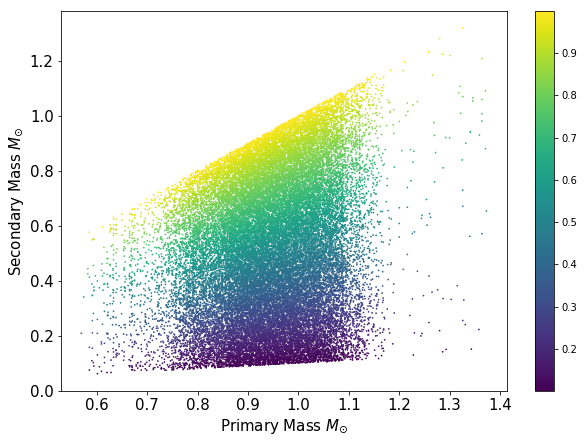

In [178]:
bins_with_sec_masses = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters_2.csv')
plt.figure(figsize=(10, 7))
plt.scatter(bins_with_sec_masses['Mact'], bins_with_sec_masses['sec_mass'], c=bins_with_sec_masses['mass_ratios'], s=0.5)
plt.xlabel(r'Primary Mass $M_{\odot}$', fontsize=15)
plt.ylabel(r'Secondary Mass $M_{\odot}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar()
plt.savefig('/Users/Jess/699-2/final_github_code/secondary_masses.png')
plt.show()

Now adding secondary temperature and composition. 

In [286]:
teff = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['logTe'] #Primary temp
comp = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['[M/H]'] #Primary comp
mass = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['Mact'] #Primary mass
sec_mass = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters_2.csv')['sec_mass']
full_sample = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters_2.csv')

running


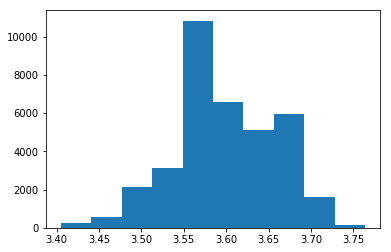

In [245]:
sec_mass = list(sec_mass)
mass = list(mass)
teff = list(teff)
final_temperature_list = []
final_composition_list = []
temperature_list = []
composition_list = []

print('running')

for i in sec_mass:

    sec_mass_compare = min(mass, key=lambda x:abs(x-i))
    idx = mass.index(sec_mass_compare)
    sec_comp = comp[idx]
    sec_temp = teff[idx]
    final_temperature_list.append(sec_temp)
    final_composition_list.append(sec_comp)

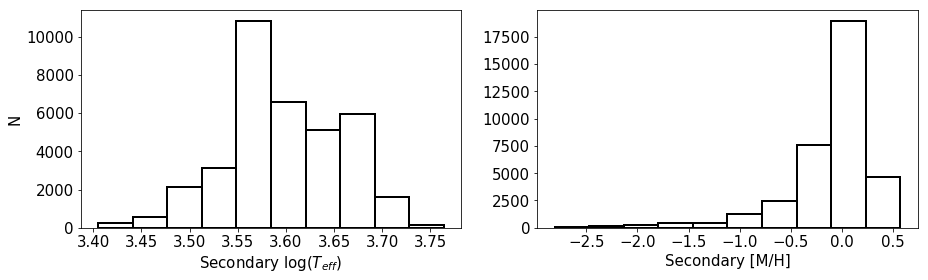

In [262]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(final_temperature_list, edgecolor='black', color='white', linewidth=2)
plt.xlabel(r'Secondary log($T_{eff}$)', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.hist(final_composition_list, edgecolor='black', color='white', linewidth=2)
plt.xlabel('Secondary [M/H]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/Jess/699-2/final_github_code/secondary_temp_and_comp.png')
plt.show()

In [287]:
full_sample_array = np.column_stack((full_sample,final_temperature_list,final_composition_list))
np.savetxt('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters_3.csv', full_sample_array, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,DDO51_finf,Mact,z.1,periods,mass_ratios,sec_mass,sec_temp,sec_comp')

This sample is then cut for M dwarf secondaries only on the basis of temperature.

In [290]:
sample = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries_with_parameters_3.csv')
rows = sample[(sample["sec_temp"] <= np.log10(4000))]
print('There are ' + str(len(rows['logTe'])) + ' G/M binaries in this sample.')
rows.to_csv('/Users/Jess/699-2/final_github_code/final_sample_gm_binaries.csv') # Save to a new CSV file

There are 19671 G/M binaries in this sample.


In [291]:
trilegal_sample = pd.read_csv('/Users/Jess/699-2/trilegal_data/trilegal_master.csv') 
print('There are ' + str(len(trilegal_sample['logTe'])) + ' stars in the TRILEGAL sample.')
full_sample = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')
print('There are ' + str(len(full_sample['logTe'])) + ' stars in the total sample.')
binaries = pd.read_csv('/Users/Jess/699-2/final_github_code/g_stars.csv')
print(str(len(binaries['logTe'])) + ' of these are G stars.')
g_stars = pd.read_csv('/Users/Jess/699-2/final_github_code/G_with_binaries.csv')
print(str(len(g_stars['logTe'])) + ' of these are binaries.')
g_m_binaries = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample_gm_binaries.csv')
print(str(len(g_m_binaries['logTe'])) + ' of these G primaries have an M companion.')

There are 6262476 stars in the TRILEGAL sample.
There are 194004 stars in the total sample.
82396 of these are G stars.
36266 of these are binaries.
19671 of these G primaries have an M companion.


In [292]:
complete_list = [str(len(trilegal_sample['logTe'])) + ' & ' + str(len(full_sample['logTe'])) + ' & ' + str(len(binaries['logTe'])) + ' & ' + str(len(g_stars['logTe'])) + ' & ' + str(len(g_m_binaries['logTe']))]
np.savetxt('/Users/Jess/699-2/final_github_code/final_statistics.txt', complete_list, fmt='%s', delimiter='&', comments='', header='TRILEGAL & Total Sample & Binaries & G Type Primaries & G/M Binaries')